In [1]:
cd /orange/adamginsburg/salt/sanhueza/W33A/

/orange/adamginsburg/salt/sanhueza/W33A


In [2]:
ls

big.reg
ipython_log_2021-09-29.py
small.reg
W33A.config8.cont_avg.selfcal_0.5_hogbom.image.fits
W33A.config8.spw0.robust0.5.image_small.fits
W33A.config8.spw1.robust0.5.image_small.fits
W33A.config8.spw2.robust0.5.image_small.fits
W33A.config8.spw3.robust0.5.image_small.fits*
W33A.zip


In [3]:
%matplotlib inline
import pylab as pl
from spectral_cube import SpectralCube
from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2abee63365b0>

In [4]:
from astropy.table import Table
from astropy import table

In [5]:
import pprint

In [6]:
import scipy, scipy.ndimage

In [7]:
import numpy as np
import os
import glob
from astropy import constants, units as u, table, stats, coordinates, wcs, log, coordinates as coord
import radio_beam
import pyspeckit
import pylab as pl
from astroquery.splatalogue.utils import minimize_table as mt
import sys
sys.path.append('/orange/adamginsburg/salt/Orion_ALMA_2016.1.00165.S/analysis')
import lines
import paths
from salt_tables import (salt_tables, salt_table_names, SO, SO2, HCl, sis_tables, AlCl, AlF, Al37Cl,
                         NaF, AlO, AlOH, NaCN, CaS, CaO)

In [8]:
import regions
from astropy import units as u, coordinates
reg = regions.Regions.read('big.reg')
regsm = regions.Regions.read('small.reg')
#egvsm = regions.Regions.read('sourceAsmaller.reg')
#regvvsm = regions.Regions.read('.reg')

# NaCl Stackl

In [9]:
from spectral_cube.analysis_utilities import stack_cube

In [10]:
nacltables = salt_tables[3:5]
nacltables[0]

Iso,Ju,Jl,vu,vl,nuCalc,e_nuCalc,x_nuCalc,E_U,Aij,Freq,gu,gl,E_L,QNs,Species
,,,,,,,,K,1 / s,GHz,,,,,
str2,int16,int16,uint8,uint8,float64,float64,str9,float64,float32,float64,int16,int16,float64,str15,str24
35,1,0,8,8,12268.92600,0.002000,MHz,4019.50,7e-07,12.268926,48,16,4018.9111844187687,v=8-8 J=1-0,23Na-35Clv=8-8 J=1-0
35,1,0,7,7,12361.41100,0.001000,MHz,3534.10,7e-07,12.361411,48,16,3533.506745838812,v=7-7 J=1-0,23Na-35Clv=7-7 J=1-0
35,1,0,6,6,12454.51100,0.001000,MHz,3043.90,7e-07,12.454511,48,16,3043.302277743511,v=6-6 J=1-0,23Na-35Clv=6-6 J=1-0
35,1,0,5,5,12548.22800,0.000000,MHz,2548.90,7e-07,12.548228,48,16,2548.29778003688,v=5-5 J=1-0,23Na-35Clv=5-5 J=1-0
35,1,0,4,4,12642.56100,0.000000,MHz,2049.20,7e-07,12.642561,48,16,2048.593252766911,v=4-4 J=1-0,23Na-35Clv=4-4 J=1-0
35,1,0,3,3,12737.51100,0.000000,MHz,1544.50,7e-07,12.737511000000001,48,16,1543.8886958856133,v=3-3 J=1-0,23Na-35Clv=3-3 J=1-0
35,1,0,2,2,12833.07700,0.000000,MHz,1034.90,7e-07,12.833077,48,16,1034.2841094409778,v=2-2 J=1-0,23Na-35Clv=2-2 J=1-0
35,1,0,1,1,12929.26100,0.000000,MHz,520.30,7e-07,12.929261,48,16,519.6794933370201,v=1-1 J=1-0,23Na-35Clv=1-1 J=1-0


In [11]:
import spectral_cube.analysis_utilities
import imp
imp.reload(spectral_cube.analysis_utilities)
from spectral_cube.analysis_utilities import stack_cube

In [12]:
flist = sorted(glob.glob('W33A.config8.spw[0-3].robust0.5.image_small.fits'))

In [13]:
for fn in flist:
    outfile = fn.replace("_small","_cb_smaller")
    if not os.path.exists(outfile):
        cube = SpectralCube.read(fn).subcube_from_regions(reg)
        cube.allow_huge_operations=True
        cb = cube.beams.common_beam(max_iter=20, max_epsilon=0.01)
        scube = cube.convolve_to(cb)
        scube.write(outfile, overwrite=True)

In [14]:
cbflist = sorted((glob.glob('W33A.config8.spw[0-3].robust0.5.image_cb_smaller.fits')))
cubes = [SpectralCube.read(fn).subcube_from_regions(regsm) for fn in cbflist]
cubes

[SpectralCube with shape=(1931, 69, 59) and unit=Jy / beam:
  n_x:     59  type_x: RA---SIN  unit_x: deg    range:   273.664551 deg:  273.664720 deg
  n_y:     69  type_y: DEC--SIN  unit_y: deg    range:   -17.866819 deg:  -17.866631 deg
  n_s:   1931  type_s: FREQ      unit_s: Hz     range: 233562367862.000 Hz:235447230123.057 Hz,
 SpectralCube with shape=(1930, 69, 59) and unit=Jy / beam:
  n_x:     59  type_x: RA---SIN  unit_x: deg    range:   273.664551 deg:  273.664720 deg
  n_y:     69  type_y: DEC--SIN  unit_y: deg    range:   -17.866819 deg:  -17.866631 deg
  n_s:   1930  type_s: FREQ      unit_s: Hz     range: 231062373964.100 Hz:232946259612.704 Hz,
 SpectralCube with shape=(3860, 69, 59) and unit=Jy / beam:
  n_x:     59  type_x: RA---SIN  unit_x: deg    range:   273.664551 deg:  273.664720 deg
  n_y:     69  type_y: DEC--SIN  unit_y: deg    range:   -17.866819 deg:  -17.866631 deg
  n_s:   3860  type_s: FREQ      unit_s: Hz     range: 216862164470.600 Hz:218746538425.725 Hz

In [15]:
# only needed for VRSCs
if hasattr(cubes[0], 'beams'):
    beams = radio_beam.Beams(beams=[cube.beams.common_beam(max_iter=20, max_epsilon=0.01) for cube in cubes])
    cb=beams.common_beam()
else:
    cb = cubes[0].beam

In [16]:
linelist = np.concatenate([data['Freq'][(data['vu'] <= 3) &
                                          np.any([((data['Freq'].quantity > cube.spectral_extrema[0]) &
                                                   (data['Freq'].quantity < cube.spectral_extrema[1]))
                                                 for cube in cubes],
                                                 axis=0)].quantity
                             for data in nacltables])
linenames = np.concatenate( [data['Species'][(data['vu'] <= 3) &
                                          np.any([((data['Freq'].quantity > cube.spectral_extrema[0]) &
                                                   (data['Freq'].quantity < cube.spectral_extrema[1]))
                                                 for cube in cubes],
                                                 axis=0)]
                             for data in nacltables] )
(linelist, linenames)

(<Quantity [217.980231, 219.614936, 232.509977, 234.251912] GHz>,
 array(['23Na-35Clv=2-2 J=17-16', '23Na-35Clv=1-1 J=17-16',
        '23Na-35Clv=1-1 J=18-17', '23Na-35Clv=0-0 J=18-17'], dtype='<U24'))

In [17]:
from astropy import log
log.setLevel('INFO')

In [18]:
cubes

[SpectralCube with shape=(1931, 69, 59) and unit=Jy / beam:
  n_x:     59  type_x: RA---SIN  unit_x: deg    range:   273.664551 deg:  273.664720 deg
  n_y:     69  type_y: DEC--SIN  unit_y: deg    range:   -17.866819 deg:  -17.866631 deg
  n_s:   1931  type_s: FREQ      unit_s: Hz     range: 233562367862.000 Hz:235447230123.057 Hz,
 SpectralCube with shape=(1930, 69, 59) and unit=Jy / beam:
  n_x:     59  type_x: RA---SIN  unit_x: deg    range:   273.664551 deg:  273.664720 deg
  n_y:     69  type_y: DEC--SIN  unit_y: deg    range:   -17.866819 deg:  -17.866631 deg
  n_s:   1930  type_s: FREQ      unit_s: Hz     range: 231062373964.100 Hz:232946259612.704 Hz,
 SpectralCube with shape=(3860, 69, 59) and unit=Jy / beam:
  n_x:     59  type_x: RA---SIN  unit_x: deg    range:   273.664551 deg:  273.664720 deg
  n_y:     69  type_y: DEC--SIN  unit_y: deg    range:   -17.866819 deg:  -17.866631 deg
  n_s:   3860  type_s: FREQ      unit_s: Hz     range: 216862164470.600 Hz:218746538425.725 Hz

In [19]:
#log.setLevel('DEBUG')
vcen = 35 * u.km/u.s # from Patricio
stack, cutouts = stack_cube(cubes,
                   linelist=linelist,
                   vmin=vcen-30*u.km/u.s,
                   vmax=vcen+30*u.km/u.s,
                   average=np.nanmean,
                   convolve_beam=cb,
                   return_cutouts=True)
#log.setLevel('INFO')
stack.writeto('NaCl_v_le_3_stackcube.fits', overwrite=True)

In [20]:
stackc = SpectralCube.read('NaCl_v_le_3_stackcube.fits')
stackc

SpectralCube with shape=(90, 69, 59) and unit=Jy / beam:
 n_x:     59  type_x: RA---SIN  unit_x: deg    range:   273.664551 deg:  273.664720 deg
 n_y:     69  type_y: DEC--SIN  unit_y: deg    range:   -17.866819 deg:  -17.866631 deg
 n_s:     90  type_s: VRAD      unit_s: km / s  range:        5.160 km / s:      64.930 km / s

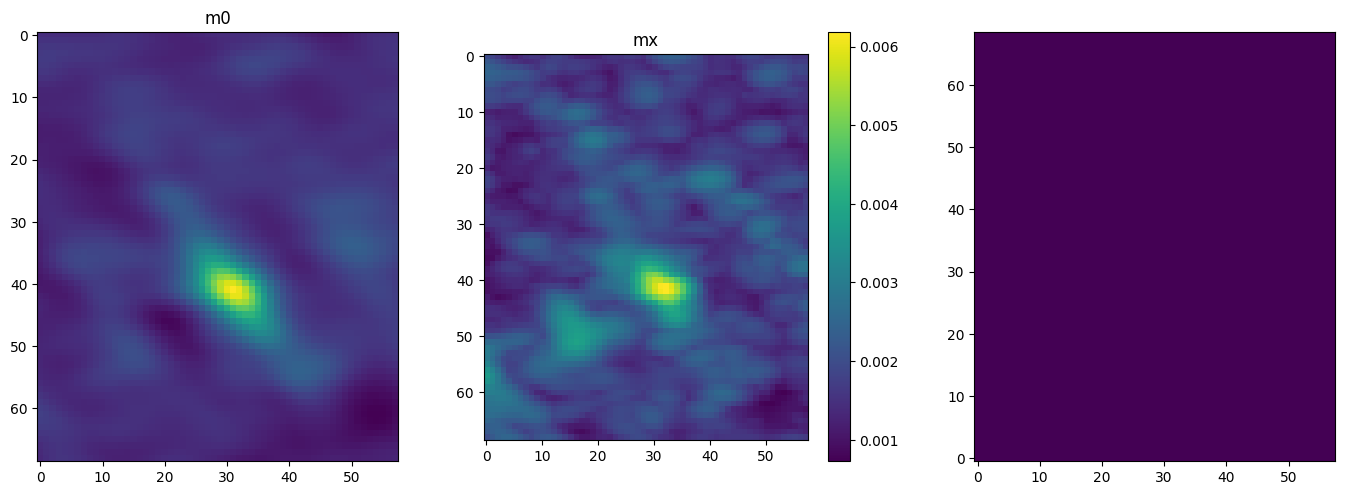

<Figure size 640x480 with 0 Axes>

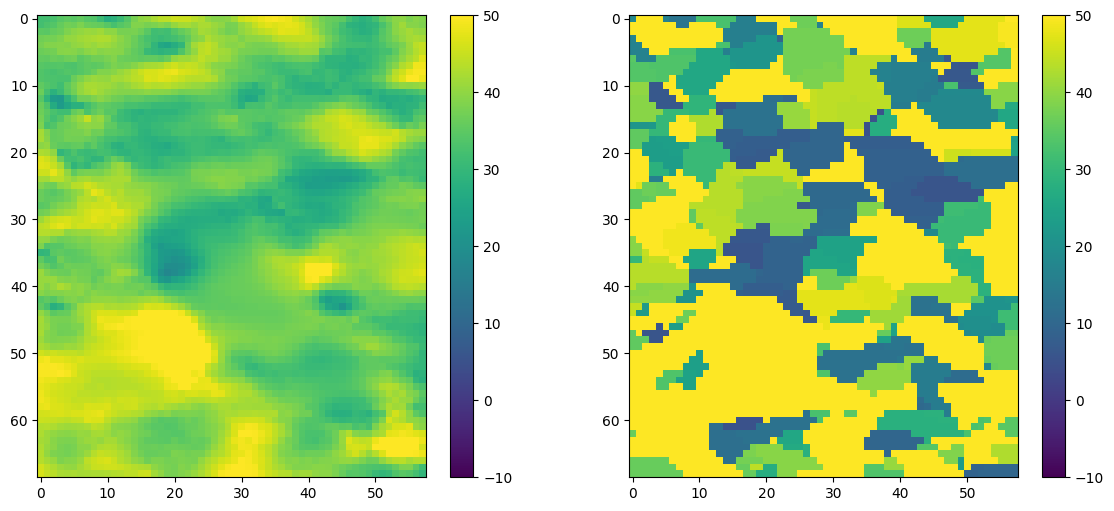

In [21]:
stackc = stackc.subcube_from_regions(regsm)
pl.figure(figsize=(14,5))
pl.subplot(1,3,1)
m0 = stackc.moment0()
m0.quicklook()
pl.title("m0")

pl.subplot(1,3,2)
mx = stackc.max(axis=0)
mx.quicklook()
pl.title("mx")
pl.colorbar()
pl.subplot(1,3,3)
msk = mx > 0.00016*mx.unit
msk = scipy.ndimage.binary_erosion(msk, iterations=1)
msk = scipy.ndimage.binary_dilation(msk, iterations=5)
pl.imshow(msk, interpolation='none', origin='lower')
pl.tight_layout()
pl.figure()


m1 = stackc.with_mask(msk).with_mask(stackc > 0.0005*stackc.unit).moment1()
pl.figure(figsize=(14,6))
ax1 = pl.subplot(1,2,1)
im = ax1.imshow(m1.value, vmin=-10, vmax=50)
pl.colorbar(mappable=im)
mxv = stackc.with_mask(msk).argmax_world(axis=0)
pl.subplot(1,2,2)
pl.imshow(mxv.value, vmin=-10, vmax=50)
pl.colorbar()


vmap = mxv.hdu

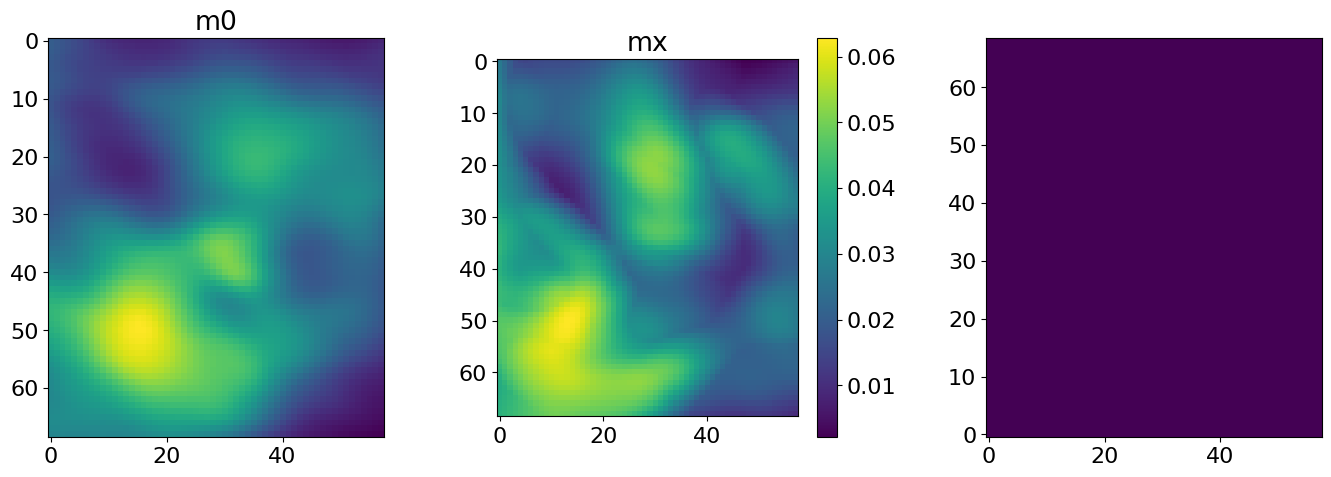

<Figure size 640x480 with 0 Axes>

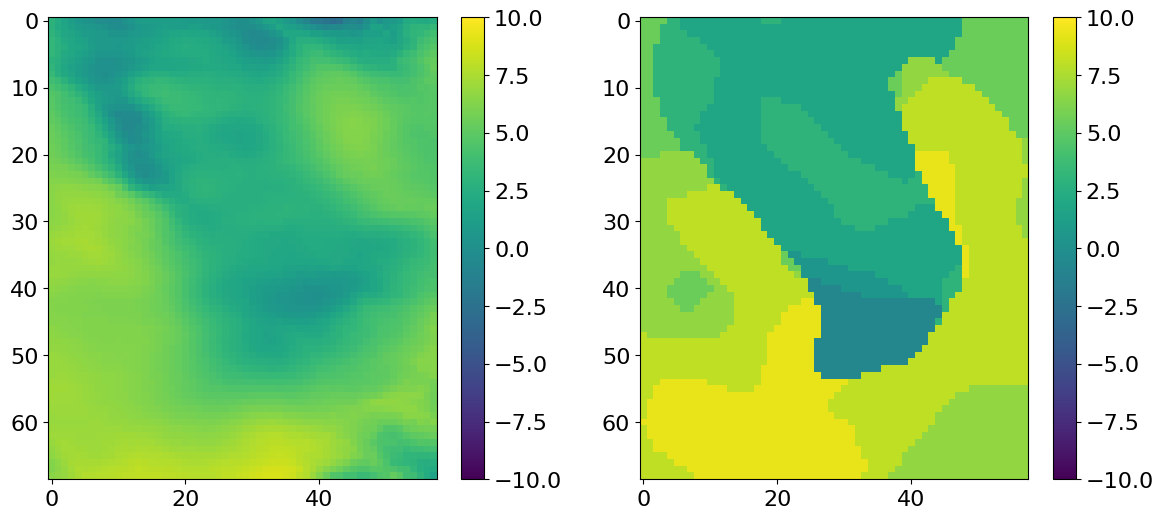

In [36]:
# try creating a vmap based on another line
restval = 232.3929*u.GHz 
cube = [c for c in cubes if (c.spectral_extrema[0] < restval) & (c.spectral_extrema[1] > restval)][0]

scube = cube.subcube_from_regions(regsm).with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=restval).spectral_slab(-20*u.km/u.s, 20*u.km/u.s)
pl.figure(figsize=(14,5))
pl.subplot(1,3,1)
m0 = scube.moment0()
m0.quicklook()
pl.title("m0")

pl.subplot(1,3,2)
mx = scube.max(axis=0)
mx.quicklook()
pl.title("mx")
pl.colorbar()
pl.subplot(1,3,3)
msk = mx > 0.00016*mx.unit
msk = scipy.ndimage.binary_erosion(msk, iterations=1)
msk = scipy.ndimage.binary_dilation(msk, iterations=5)
pl.imshow(msk, interpolation='none', origin='lower')
pl.tight_layout()
pl.figure()


m1 = scube.with_mask(msk).with_mask(scube > 0.0005*stackc.unit).moment1()
pl.figure(figsize=(14,6))
ax1 = pl.subplot(1,2,1)
im = ax1.imshow(m1.value, vmin=-10, vmax=10)
pl.colorbar(mappable=im)
mxv = scube.with_mask(msk).argmax_world(axis=0)
pl.subplot(1,2,2)
pl.imshow(mxv.value, vmin=-10, vmax=10)
pl.colorbar()


vmap = mxv.hdu
vmap = m1.hdu
# the rest value selected above was just the line center; we need to assume it's really 35 km/s off
vmap.data = vmap.data + 35

In [37]:
import sys
sys.path.append('/orange/adamginsburg/salt/code/')
from overplot_saltlines import overplot_saltlines

In [38]:
spectra = []
for ii,cube in enumerate(cubes):
    cube.allow_huge_operations=True
    sp = cube.subcube_from_regions(regsm).mean(axis=(1,2))
    pysp = pyspeckit.Spectrum(data=sp, xarr=sp.spectral_axis, header=sp.header)
    spectra.append(pysp)
    pysp.specname = f'spw{ii+1}'

In [39]:
mkdir -p spectra/figures

spw1
spw2


spw3
spw4


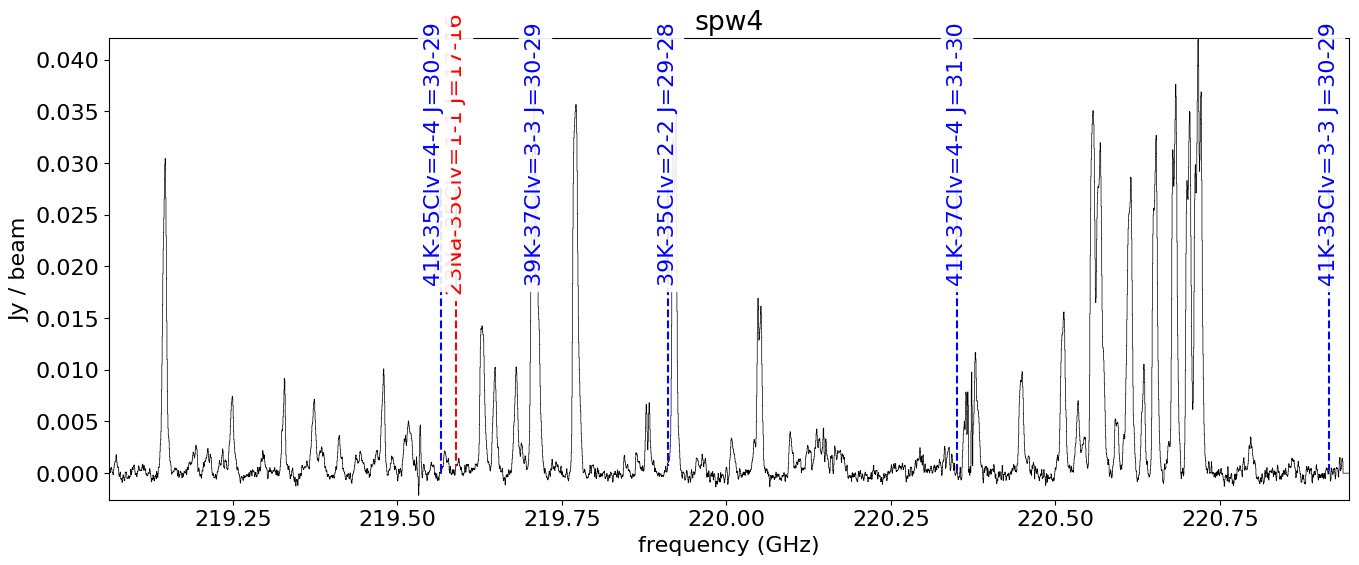

In [40]:
overplot_saltlines(spectra, vcen=vcen, savepath='spectra/figures')

In [41]:
ls spectra/figures

color_labels_spw1.png
color_labels_spw2.png
color_labels_spw3.png
color_labels_spw4.png
color_labels_W33A.config8.spw0_5_stack.png
color_labels_W33A.config8.spw1_5_stack.png
color_labels_W33A.config8.spw2_5_stack.png
color_labels_W33A.config8.spw3_5_stack.png
spw1.png
spw2.png
spw3.png
spw4.png
W33A.config8.spw0_5_stack.png
W33A.config8.spw0.robust0.5.image_cb_smaller_stack.pdf
W33A.config8.spw0.robust0.5.image_cb_smaller_stack.png
W33A.config8.spw1_5_stack.png
W33A.config8.spw1.robust0.5.image_cb_smaller_stack.pdf
W33A.config8.spw1.robust0.5.image_cb_smaller_stack.png
W33A.config8.spw2_5_stack.png
W33A.config8.spw2.robust0.5.image_cb_smaller_stack.pdf
W33A.config8.spw2.robust0.5.image_cb_smaller_stack.png
W33A.config8.spw3_5_stack.png
W33A.config8.spw3.robust0.5.image_cb_smaller_stack.pdf
W33A.config8.spw3.robust0.5.image_cb_smaller_stack.png


In [42]:
from IPython.display import Image,display

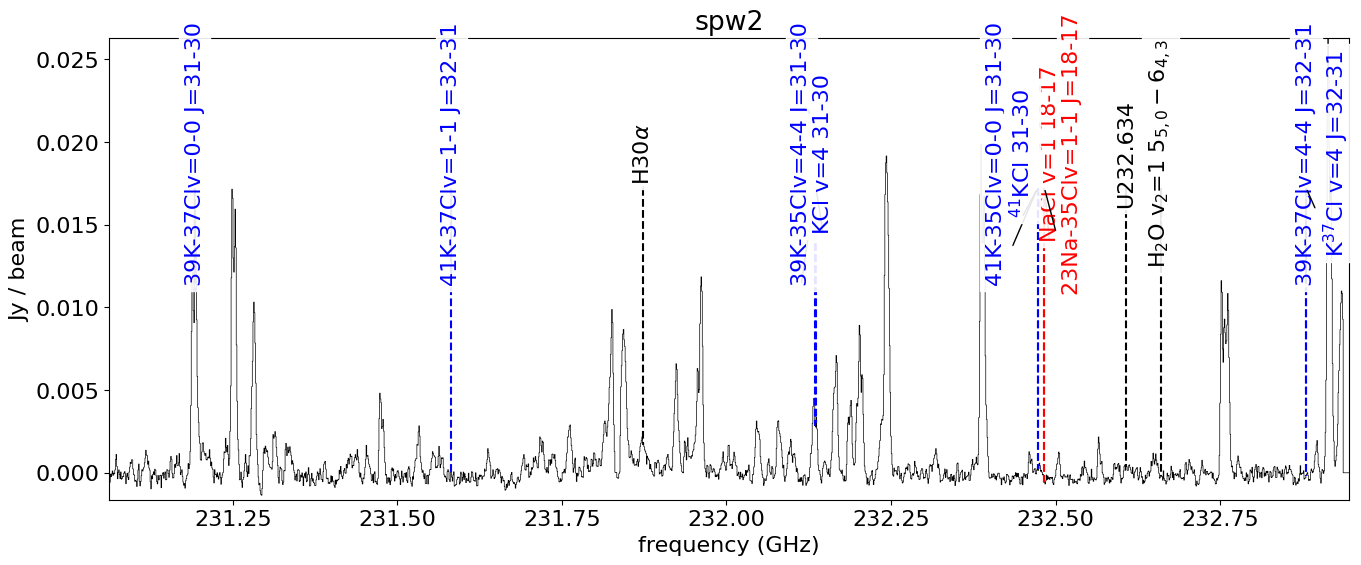

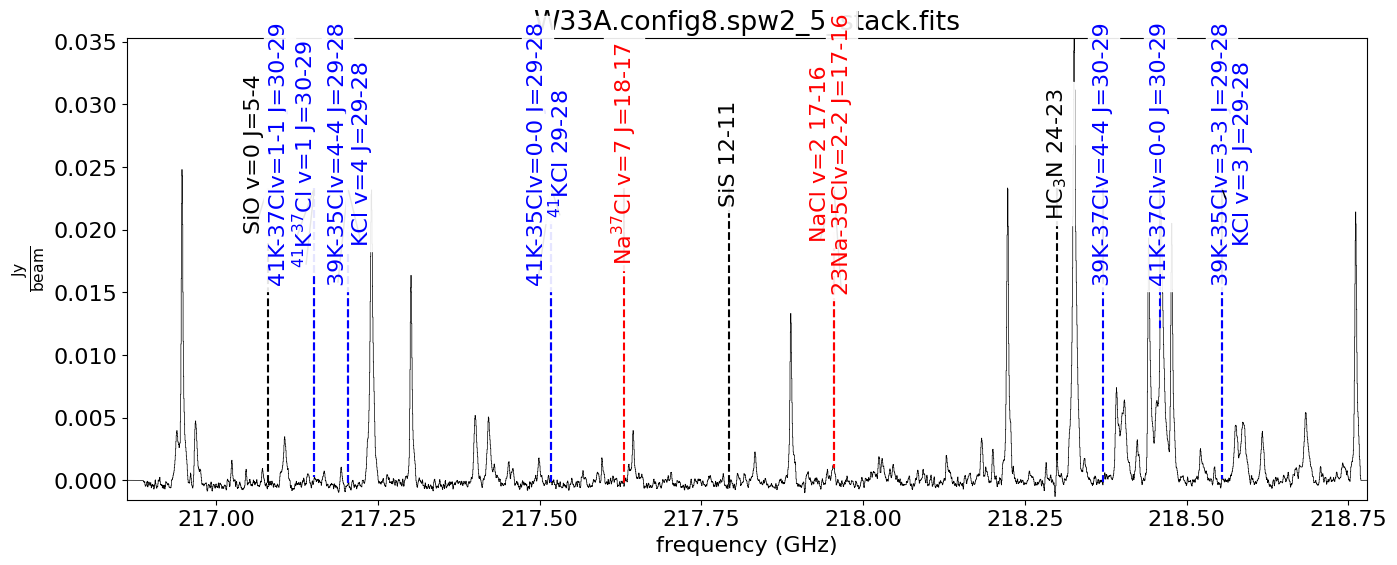

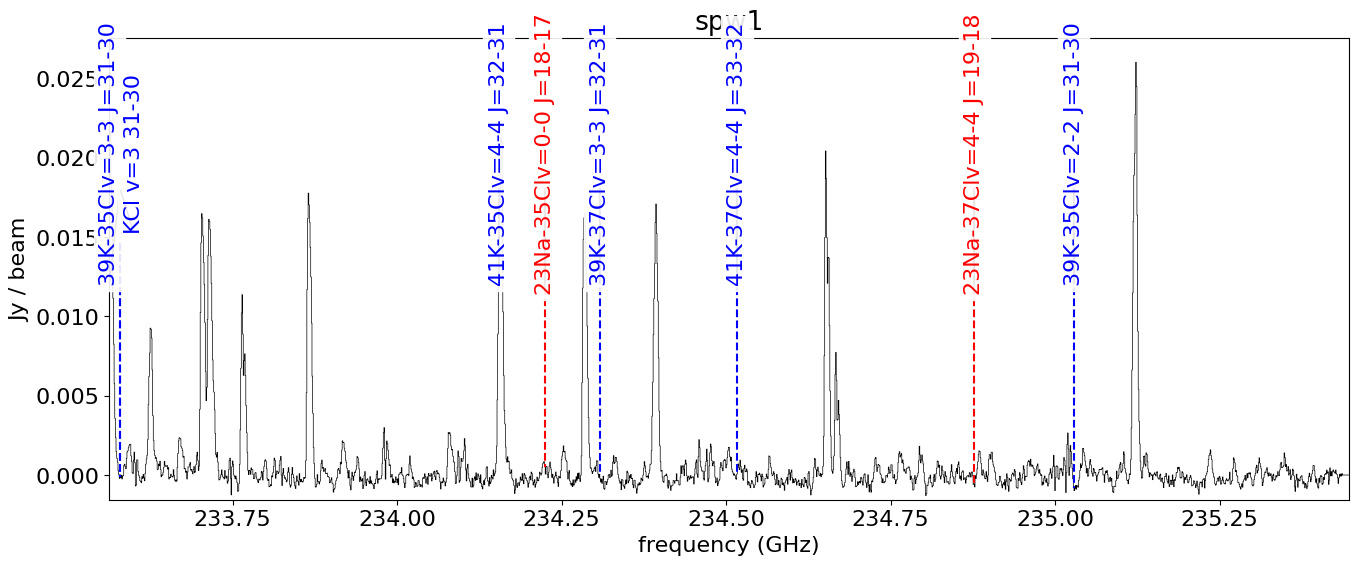

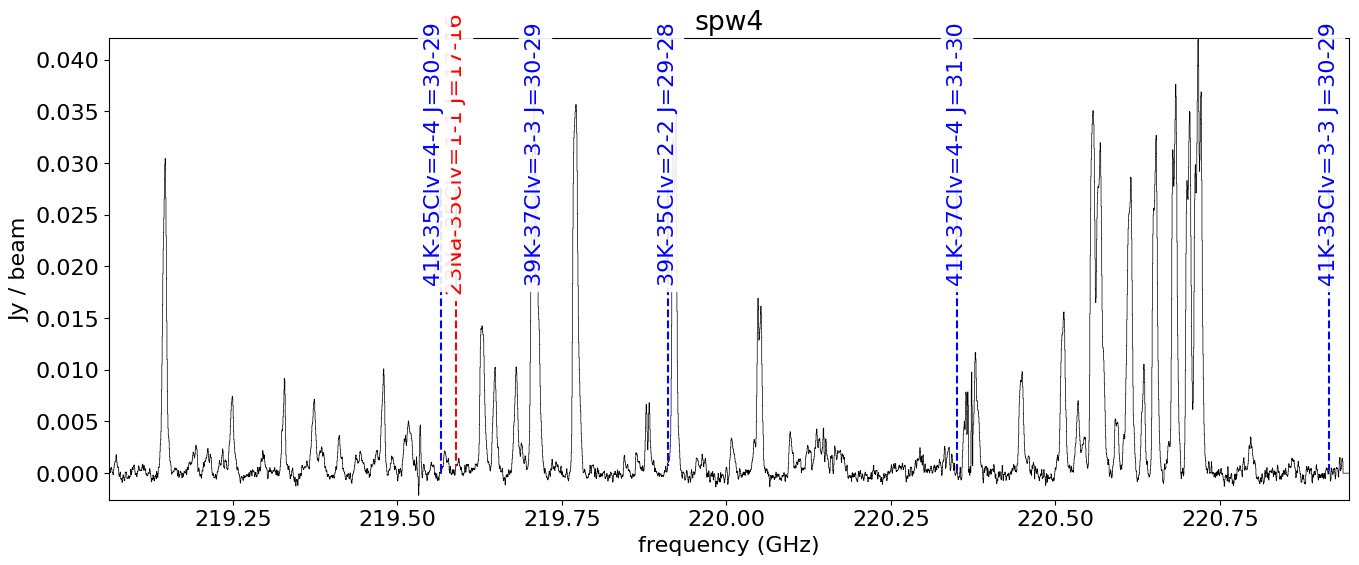

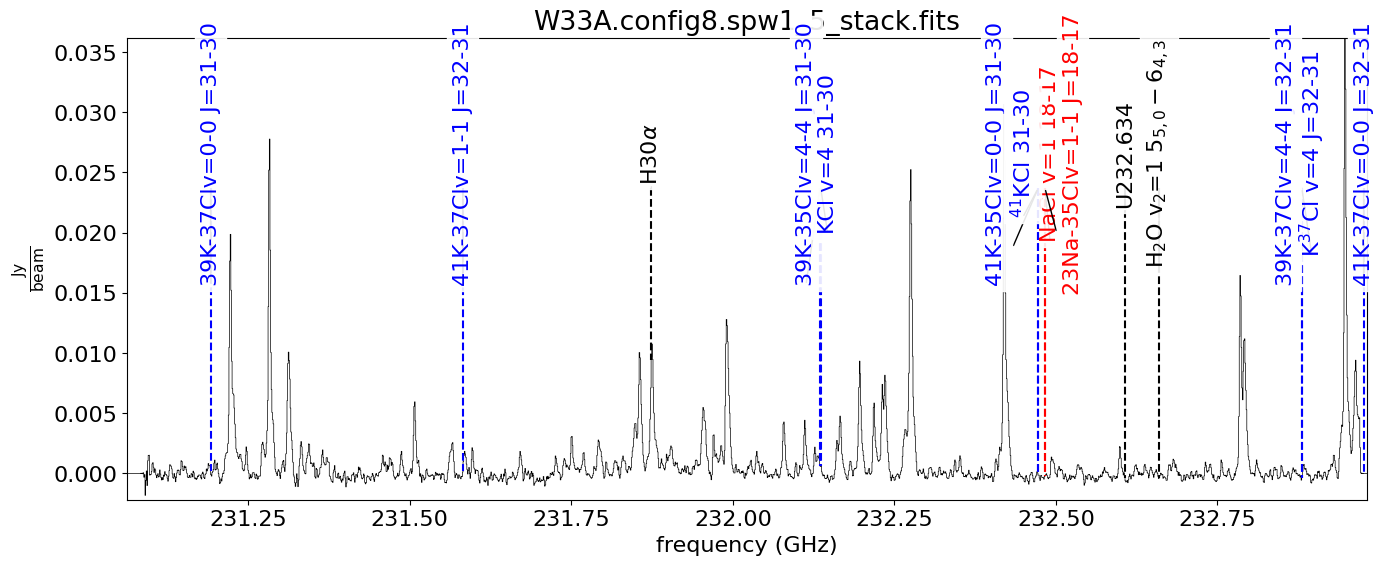

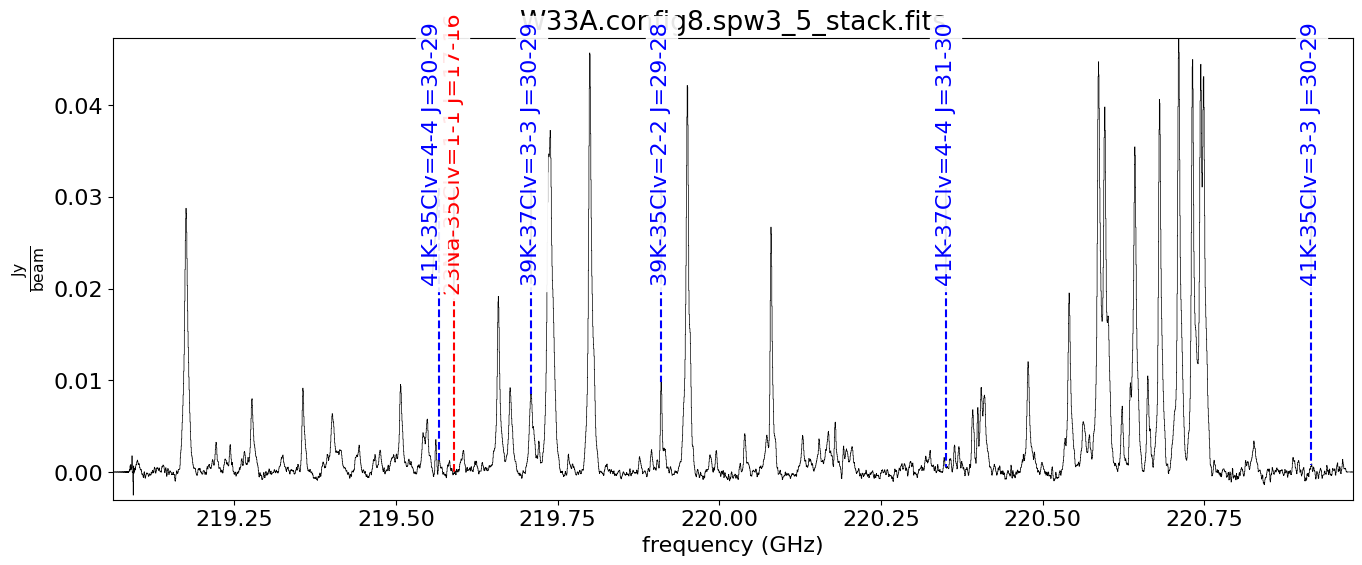

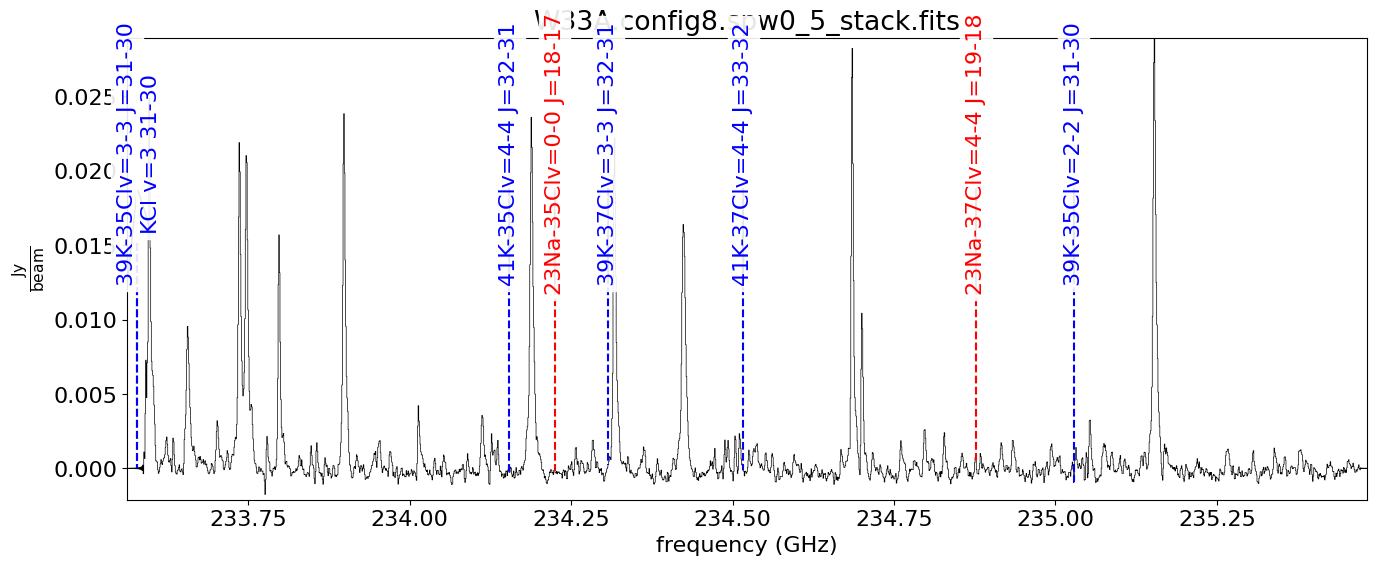

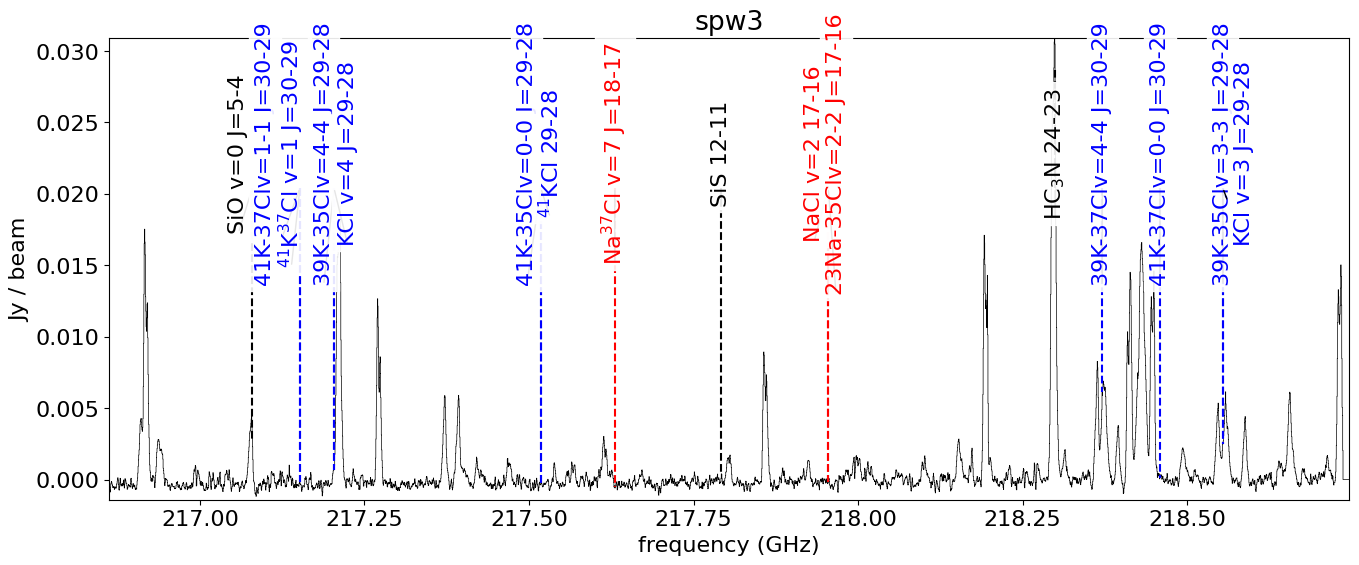

In [43]:
for fn in glob.glob('spectra/figures/color*png'):
    display(Image(fn))

In [ ]:
import glob
import spectral_cube.analysis_utilities
import reproject
from tqdm.notebook import tqdm

for fn in cbflist:
    basename = os.path.split(fn)[-1].split(".fits")[0]
    try:
        cube = SpectralCube.read(fn, use_dask=True)
    except Exception as ex:
        print(ex)
        continue
    print(cube)
    scube = cube.subcube_from_regions(regsm)
    mx = scube.max(axis=0)
    #msk = mx > 0.003*mx.unit
    print("Mean spectrum")
    sp = scube.mean(axis=(1,2))
    
    sp.write(f'spectra/{fn.split("/")[-1].replace(".fits","_meanspec.fits")}', overwrite=True)


    # reproject the velocity map into the cube's coordinate system
    vmap_proj,_ = reproject.reproject_interp(vmap,
                                             scube.wcs.celestial,
                                             shape_out=scube.shape[1:])
    vmap_proj = u.Quantity(vmap_proj, u.km/u.s)

    # convert to km/s with arbitrary rest value so 0 km/s can be interpreted
    if scube.spectral_axis.unit.is_equivalent(u.Hz):
        scube = scube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=scube.spectral_axis.mean())

    print("Stacking")
    # perform the stacking!
    stack = spectral_cube.analysis_utilities.stack_spectra(scube, vmap_proj,
                                                           v0=0.0*u.km/u.s,
                                                           #progressbar=tqdm,
                                                           #num_cores=8
                                                          )
    fstack = stack.with_spectral_unit(u.GHz)

    pl.suptitle(f"{fn}")
    fstack.write(f'spectra/{basename}_stack.fits', overwrite=True)

    pl.clf()
    fstack.quicklook(filename=f'spectra/figures/{basename}_stack.pdf')
    fstack.quicklook(filename=f'spectra/figures/{basename}_stack.png')
    
    
    fig = pl.figure()
    mappable = pl.subplot(1,2,1).imshow(mx.value, origin='lower', interpolation='none')
    pl.colorbar(mappable)
    pl.subplot(1,2,2)
    pl.suptitle(fn)
    sp.quicklook()

DaskSpectralCube with shape=(1931, 412, 345) and unit=Jy / beam and chunk size (255, 206, 255):
 n_x:    345  type_x: RA---SIN  unit_x: deg    range:   273.663903 deg:  273.664907 deg
 n_y:    412  type_y: DEC--SIN  unit_y: deg    range:   -17.867436 deg:  -17.866294 deg
 n_s:   1931  type_s: FREQ      unit_s: Hz     range: 233562367862.000 Hz:235447230123.057 Hz
Mean spectrum
Stacking


In [ ]:
ls spectra

In [ ]:
stackspectra = []
for ii,fn in enumerate(glob.glob('spectra/*_stack.fits')):
    pysp = pyspeckit.Spectrum(fn)
    basename = os.path.basename(fn)
    spl = basename.split(".")
    pysp.specname = f'{".".join(spl[0:3])}_{spl[4]}_stack.fits'
    print(pysp.specname)
    stackspectra.append(pysp)

In [ ]:
overplot_saltlines(stackspectra, vcen=vcen, savepath='spectra/figures')

In [ ]:
ls spectra/figures/

In [ ]:
for fn in glob.glob('spectra/figures/color*stack.png'):
    display(Image(fn))